### Fijo k, fijo alfa, y defino un intervalo con las cantidades de imágenes que voy a usar para entrenamiento. Las primeras 2 mil las voy a usar para validación.

In [54]:
k = 10
alfa = 15
cantImg = [1]
for i in range(1000,41000,1000):
    cantImg.append(i)

In [55]:
cantImg

[1,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

### Cargo los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_total = pd.read_csv("../data/train.csv")

### Pruebo primero con una sóla imagen de entrenamiento

#### Reduzco el dataset

In [4]:
df_red = df_total[:2001]

In [5]:
df_red

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Uso values para mandar todo a arrays de numpy
X = df_red[df_red.columns[1:]].values
y = df_red["label"].values.reshape(-1, 1)

X.shape, y.shape

((2001, 784), (2001, 1))

#### Aplico PCA

In [7]:
import metnum

pca = metnum.PCA(alfa)
X = pca.transform(X)

#### Me fijo qué aspecto tienen las componentes principales con este dataset reducido

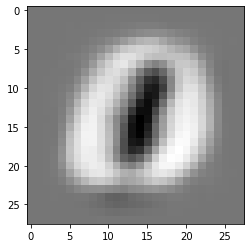

In [8]:
import matplotlib.pyplot as plt

cp = pca.componentesPrincipales()
cp = cp.transpose()
img = cp[0].reshape(28, 28)
plt.imshow(img, cmap="Greys")

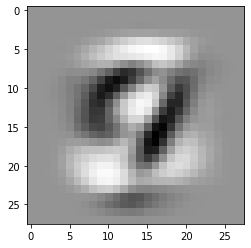

In [9]:
img = cp[1].reshape(28, 28)
plt.imshow(img, cmap="Greys")

#### Es más o menos igual. Aplico kNN.

In [10]:
X_train, y_train = X[2000:], y[2000:]
X_val, y_val = X[:2000], y[:2000]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 1 instancias de entrenamiento y 2000 de validación


In [11]:
clf = metnum.KNNClassifier(k)
clf.fit(X_train, y_train)

In [12]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.098
CPU times: user 492 ms, sys: 164 ms, total: 656 ms
Wall time: 405 ms


### Ahora pruebo con las cantidades de la lista cantImg

In [13]:
from tqdm import tqdm

resultados = []

for i in tqdm(cantImg):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados.append(acc)

  2%|▏         | 1/41 [00:23<15:47, 23.69s/it]

Ahora tengo 1 instancias de entrenamiento y 2000 de validación


  5%|▍         | 2/41 [00:48<15:55, 24.49s/it]

Ahora tengo 1000 instancias de entrenamiento y 2000 de validación
Ahora tengo 2000 instancias de entrenamiento y 2000 de validación


  7%|▋         | 3/41 [01:13<15:27, 24.40s/it]

Ahora tengo 3000 instancias de entrenamiento y 2000 de validación


 10%|▉         | 4/41 [01:38<15:12, 24.66s/it]

Ahora tengo 4000 instancias de entrenamiento y 2000 de validación


 12%|█▏        | 5/41 [02:02<14:42, 24.52s/it]

Ahora tengo 5000 instancias de entrenamiento y 2000 de validación


 15%|█▍        | 6/41 [02:28<14:36, 25.06s/it]

Ahora tengo 6000 instancias de entrenamiento y 2000 de validación


 17%|█▋        | 7/41 [02:58<15:04, 26.61s/it]

Ahora tengo 7000 instancias de entrenamiento y 2000 de validación


 20%|█▉        | 8/41 [03:24<14:29, 26.35s/it]

Ahora tengo 8000 instancias de entrenamiento y 2000 de validación


 22%|██▏       | 9/41 [03:52<14:26, 27.08s/it]

Ahora tengo 9000 instancias de entrenamiento y 2000 de validación


 24%|██▍       | 10/41 [04:18<13:48, 26.73s/it]

Ahora tengo 10000 instancias de entrenamiento y 2000 de validación


 27%|██▋       | 11/41 [04:45<13:18, 26.61s/it]

Ahora tengo 11000 instancias de entrenamiento y 2000 de validación


 29%|██▉       | 12/41 [05:11<12:51, 26.61s/it]

Ahora tengo 12000 instancias de entrenamiento y 2000 de validación


 32%|███▏      | 13/41 [05:38<12:23, 26.55s/it]

Ahora tengo 13000 instancias de entrenamiento y 2000 de validación


 34%|███▍      | 14/41 [06:07<12:16, 27.29s/it]

Ahora tengo 14000 instancias de entrenamiento y 2000 de validación


 37%|███▋      | 15/41 [06:36<12:09, 28.05s/it]

Ahora tengo 15000 instancias de entrenamiento y 2000 de validación


 39%|███▉      | 16/41 [07:08<12:10, 29.21s/it]

Ahora tengo 16000 instancias de entrenamiento y 2000 de validación


 41%|████▏     | 17/41 [07:37<11:35, 28.98s/it]

Ahora tengo 17000 instancias de entrenamiento y 2000 de validación


 44%|████▍     | 18/41 [08:07<11:18, 29.49s/it]

Ahora tengo 18000 instancias de entrenamiento y 2000 de validación


 46%|████▋     | 19/41 [08:37<10:50, 29.55s/it]

Ahora tengo 19000 instancias de entrenamiento y 2000 de validación


 49%|████▉     | 20/41 [09:08<10:31, 30.09s/it]

Ahora tengo 20000 instancias de entrenamiento y 2000 de validación


 51%|█████     | 21/41 [09:38<10:01, 30.06s/it]

Ahora tengo 21000 instancias de entrenamiento y 2000 de validación


 54%|█████▎    | 22/41 [10:10<09:40, 30.53s/it]

Ahora tengo 22000 instancias de entrenamiento y 2000 de validación


 56%|█████▌    | 23/41 [10:44<09:27, 31.54s/it]

Ahora tengo 23000 instancias de entrenamiento y 2000 de validación


 59%|█████▊    | 24/41 [11:18<09:09, 32.33s/it]

Ahora tengo 24000 instancias de entrenamiento y 2000 de validación


 61%|██████    | 25/41 [11:54<08:56, 33.54s/it]

Ahora tengo 25000 instancias de entrenamiento y 2000 de validación


 63%|██████▎   | 26/41 [12:28<08:24, 33.67s/it]

Ahora tengo 26000 instancias de entrenamiento y 2000 de validación


 66%|██████▌   | 27/41 [12:59<07:38, 32.78s/it]

Ahora tengo 27000 instancias de entrenamiento y 2000 de validación


 68%|██████▊   | 28/41 [13:35<07:16, 33.56s/it]

Ahora tengo 28000 instancias de entrenamiento y 2000 de validación


 71%|███████   | 29/41 [14:07<06:40, 33.35s/it]

Ahora tengo 29000 instancias de entrenamiento y 2000 de validación


 73%|███████▎  | 30/41 [14:44<06:17, 34.28s/it]

Ahora tengo 30000 instancias de entrenamiento y 2000 de validación


 76%|███████▌  | 31/41 [15:18<05:41, 34.15s/it]

Ahora tengo 31000 instancias de entrenamiento y 2000 de validación


 78%|███████▊  | 32/41 [15:56<05:19, 35.45s/it]

Ahora tengo 32000 instancias de entrenamiento y 2000 de validación


 80%|████████  | 33/41 [16:34<04:48, 36.05s/it]

Ahora tengo 33000 instancias de entrenamiento y 2000 de validación


 83%|████████▎ | 34/41 [17:12<04:16, 36.67s/it]

Ahora tengo 34000 instancias de entrenamiento y 2000 de validación


 85%|████████▌ | 35/41 [17:50<03:42, 37.09s/it]

Ahora tengo 35000 instancias de entrenamiento y 2000 de validación


 88%|████████▊ | 36/41 [18:28<03:06, 37.31s/it]

Ahora tengo 36000 instancias de entrenamiento y 2000 de validación


 90%|█████████ | 37/41 [19:04<02:28, 37.13s/it]

Ahora tengo 37000 instancias de entrenamiento y 2000 de validación


 93%|█████████▎| 38/41 [19:42<01:52, 37.37s/it]

Ahora tengo 38000 instancias de entrenamiento y 2000 de validación


 95%|█████████▌| 39/41 [20:21<01:15, 37.81s/it]

Ahora tengo 39000 instancias de entrenamiento y 2000 de validación


 98%|█████████▊| 40/41 [21:02<00:38, 38.67s/it]

Ahora tengo 40000 instancias de entrenamiento y 2000 de validación


100%|██████████| 41/41 [21:40<00:00, 31.71s/it]


In [15]:
resultados[0]

0.0

### La verdad que no sé por qué resultados[0] me da 0.0. Me tendría que haber dado 0.098, como aparece en la celda 12.

### Agrego un par de resultados más para para cantidades entre 2 y 1000.

In [19]:
cantImg2 = [2,25,50,75]
for i in range(100,1000,100):
    cantImg2.append(i)

In [20]:
cantImg2

[2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [21]:
resultados2 = []

for i in tqdm(cantImg2):
    limite = 2000 + i
    df_red = df_total[:limite]
    X = df_red[df_red.columns[1:]].values
    y = df_red["label"].values.reshape(-1, 1)
    pca = metnum.PCA(alfa)
    X = pca.transform(X)
    
    X_train, y_train = X[2000:], y[2000:]
    X_val, y_val = X[:2000], y[:2000]
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    clf = metnum.KNNClassifier(k)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    resultados2.append(acc)

  8%|▊         | 1/13 [00:28<05:41, 28.43s/it]

Ahora tengo 2 instancias de entrenamiento y 2000 de validación


 15%|█▌        | 2/13 [00:53<04:51, 26.46s/it]

Ahora tengo 25 instancias de entrenamiento y 2000 de validación


 23%|██▎       | 3/13 [01:18<04:19, 25.96s/it]

Ahora tengo 50 instancias de entrenamiento y 2000 de validación


 31%|███       | 4/13 [01:44<03:52, 25.79s/it]

Ahora tengo 75 instancias de entrenamiento y 2000 de validación


 38%|███▊      | 5/13 [02:09<03:25, 25.69s/it]

Ahora tengo 100 instancias de entrenamiento y 2000 de validación


 46%|████▌     | 6/13 [02:32<02:52, 24.58s/it]

Ahora tengo 200 instancias de entrenamiento y 2000 de validación


 54%|█████▍    | 7/13 [02:57<02:28, 24.67s/it]

Ahora tengo 300 instancias de entrenamiento y 2000 de validación


 62%|██████▏   | 8/13 [03:23<02:05, 25.03s/it]

Ahora tengo 400 instancias de entrenamiento y 2000 de validación


 77%|███████▋  | 10/13 [04:13<01:15, 25.07s/it]

Ahora tengo 500 instancias de entrenamiento y 2000 de validación
Ahora tengo 600 instancias de entrenamiento y 2000 de validación


 92%|█████████▏| 12/13 [05:01<00:24, 24.68s/it]

Ahora tengo 700 instancias de entrenamiento y 2000 de validación
Ahora tengo 800 instancias de entrenamiento y 2000 de validación


100%|██████████| 13/13 [05:24<00:00, 25.00s/it]

Ahora tengo 900 instancias de entrenamiento y 2000 de validación


In [22]:
resultados2

[0.096,
 0.273,
 0.4615,
 0.564,
 0.6355,
 0.735,
 0.786,
 0.819,
 0.828,
 0.839,
 0.853,
 0.853,
 0.857]

### Combino los resultados

In [72]:
todosLosResultados = []

In [73]:
todosLosResultados.append(resultados[0])

In [74]:
todosLosResultados = todosLosResultados + resultados2

In [75]:
todosLosResultados

[0.0,
 0.096,
 0.273,
 0.4615,
 0.564,
 0.6355,
 0.735,
 0.786,
 0.819,
 0.828,
 0.839,
 0.853,
 0.853,
 0.857]

In [76]:
todosLosResultados = todosLosResultados + resultados[1:]

In [77]:
todosLosResultados

[0.0,
 0.096,
 0.273,
 0.4615,
 0.564,
 0.6355,
 0.735,
 0.786,
 0.819,
 0.828,
 0.839,
 0.853,
 0.853,
 0.857,
 0.8635,
 0.8945,
 0.913,
 0.9225,
 0.932,
 0.9285,
 0.9325,
 0.935,
 0.935,
 0.9385,
 0.9405,
 0.9395,
 0.9385,
 0.941,
 0.9455,
 0.9455,
 0.95,
 0.9485,
 0.9505,
 0.9485,
 0.948,
 0.949,
 0.951,
 0.953,
 0.9555,
 0.9545,
 0.955,
 0.9545,
 0.9545,
 0.9555,
 0.9555,
 0.9555,
 0.955,
 0.9545,
 0.9555,
 0.957,
 0.955,
 0.956,
 0.9565,
 0.958]

### Ahora grafico esto

In [78]:
cantidades = []

In [79]:
cantidades.append(1)

In [80]:
cantidades

[1]

In [81]:
cantidades = cantidades + cantImg2

In [82]:
cantidades

[1, 2, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [83]:
cantidades = cantidades + cantImg[1:]

In [84]:
cantidades

[1,
 2,
 25,
 50,
 75,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 11000,
 12000,
 13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000]

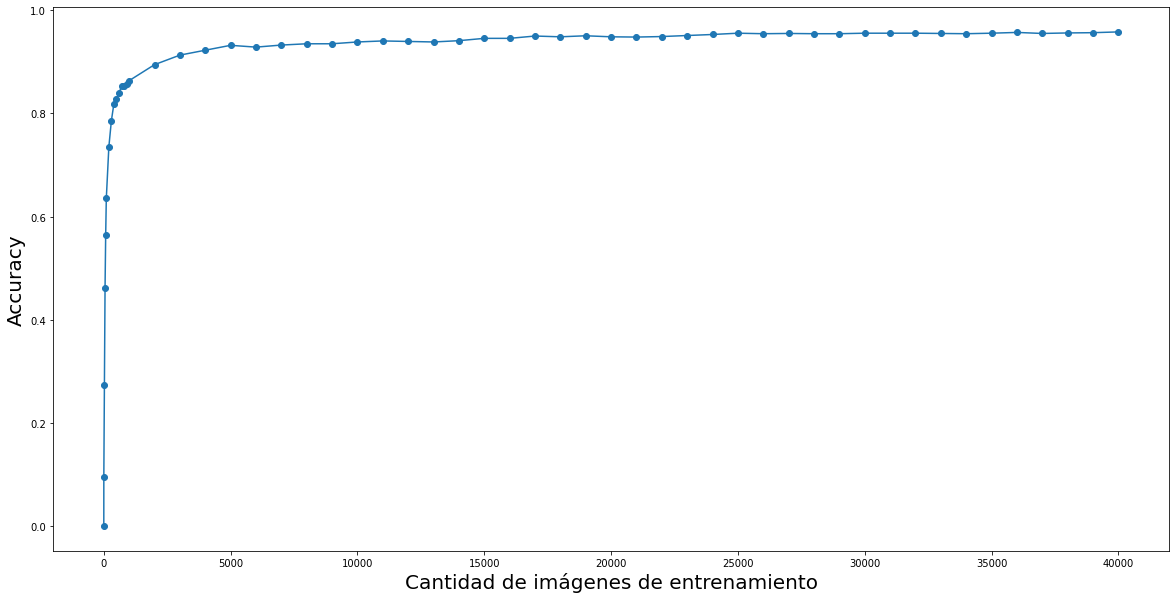

In [86]:
plt.scatter(cantidades,todos)
plt.plot(cantidades,todos)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Cantidad de imágenes de entrenamiento', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.savefig("cambio_cant_imagenes.png", bbox_inches='tight')